In [31]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm                
import statsmodels.formula.api as smf

In [2]:
data_loc = "../Data/pbi.csv"

datapbi = pd.read_csv(data_loc,encoding='latin1',delimiter=';',decimal=".",index_col=0)
datapbi = datapbi.drop(['Country Code'], axis=1)



In [3]:
datapbi = datapbi[['2011', '2012','2013','2014','2015','2016','2017','2018','2019','2020']].apply(lambda x: x.str.replace(',', '.').astype(float), axis=1)
datapbi.head(2)

,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
Country Name,,,,,,,,,,
Argentina,10883.3,10649.8,10784.6,10398.7,10568.2,10239.5,10419.5,10049.6,9742.5,8692.7
Australia,52567.8,53682.0,54129.9,54679.4,55079.9,55728.7,56058.5,56832.1,57183.4,56307.3


In [4]:
#datapbi = datapbi.transpose()

In [5]:
data_location = "../Data/tcr.csv"

datatcr = pd.read_csv(data_location,delimiter=',',index_col=0)
datatcr = datatcr.drop(['Country Code'], axis=1)
datatcr = datatcr.rename(columns={'Country Name': 'pais'})
datatcr.head(2)

,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
Country Name,,,,,,,,,,
Argentina,93.40,80.00,77.10,81.20,63.50,72.40,67.80,84.10,93.30,118.40
Australia,106.96,109.03,103.45,98.32,89.85,90.93,93.69,89.95,86.01,85.36


In [6]:
#datatcr=datatcr.transpose()


In [7]:

datatcr['Variable']='TCR'
datapbi['Variable']='PBI'

In [8]:

unidos = datatcr.append(datapbi)

In [9]:
#unidos.transpose()
unidos.head(2)

,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,Variable
Country Name,,,,,,,,,,,
Argentina,93.40,80.00,77.10,81.20,63.50,72.40,67.80,84.10,93.30,118.40,TCR
Australia,106.96,109.03,103.45,98.32,89.85,90.93,93.69,89.95,86.01,85.36,TCR


In [10]:
unidos.head(40)

,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,Variable
Country Name,,,,,,,,,,,
Argentina,93.40,80.00,77.10,81.20,63.50,72.40,67.80,84.10,93.30,118.40,TCR
Australia,106.96,109.03,103.45,98.32,89.85,90.93,93.69,89.95,86.01,85.36,TCR
Bahamas,99.34,99.26,99.01,99.00,102.26,101.33,100.71,100.49,101.85,100.28,TCR
Belice,95.37,96.98,95.40,96.35,102.61,104.38,102.63,99.90,100.10,99.54,TCR
Bolivia,102.29,106.66,112.27,120.09,137.69,143.32,140.12,143.26,149.84,157.44,TCR
Brasil,103.18,92.01,86.43,84.59,69.62,73.04,79.26,70.98,69.68,55.31,TCR
Bulgaria,101.45,100.02,100.92,100.11,96.82,96.97,98.04,101.31,101.82,104.68,TCR
Camerún,100.22,96.46,98.92,99.72,93.54,95.64,96.53,97.92,96.85,99.85,TCR
Canadá,101.56,101.08,97.48,91.48,83.13,81.53,82.75,82.30,81.52,80.63,TCR


In [11]:
df_reset = unidos.reset_index()
df_reset.head(3)

,Country Name,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,Variable
0,Argentina,93.40,80.00,77.10,81.20,63.50,72.40,67.80,84.10,93.30,118.40,TCR
1,Australia,106.96,109.03,103.45,98.32,89.85,90.93,93.69,89.95,86.01,85.36,TCR
2,Bahamas,99.34,99.26,99.01,99.00,102.26,101.33,100.71,100.49,101.85,100.28,TCR


In [12]:
final = (df_reset.set_index(['Country Name', 'Variable'])
   .rename_axis(['Year'], axis=1)
   .stack()
   .unstack('Variable')
   .reset_index())


In [13]:
final.head(30)

Variable,Country Name,Year,PBI,TCR
0,Argentina,2011,10883.3,93.40
1,Argentina,2012,10649.8,80.00
2,Argentina,2013,10784.6,77.10
3,Argentina,2014,10398.7,81.20
4,Argentina,2015,10568.2,63.50
5,Argentina,2016,10239.5,72.40
6,Argentina,2017,10419.5,67.80
7,Argentina,2018,10049.6,84.10
8,Argentina,2019,9742.5,93.30
9,Argentina,2020,8692.7,118.40


In [14]:
final['log_TCR'] = np.log10(final['TCR'])
final['log_PBI'] =  np.log10(final['PBI'])
final.head(5)

Variable,Country Name,Year,PBI,TCR,log_TCR,log_PBI
0,Argentina,2011,10883.3,93.4,1.970347,4.036761
1,Argentina,2012,10649.8,80.0,1.903090,4.027341
2,Argentina,2013,10784.6,77.1,1.887054,4.032804
3,Argentina,2014,10398.7,81.2,1.909556,4.016979
4,Argentina,2015,10568.2,63.5,1.802774,4.024001


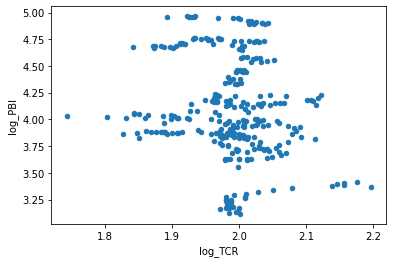

In [29]:
final.plot(kind='scatter', x='log_TCR', y='log_PBI');

In [42]:
fig = px.scatter(final, x="log_TCR", y="log_PBI", marginal_x="histogram", marginal_y="rug",hover_name='Country Name',log_y=True)
fig.show()

In [85]:
fig = px.scatter(final, x='Year', y='log_PBI'
                 ,size='TCR', size_max=25,
    width=1000
                 
                 ,color= 'Country Name')
fig.update_layout(template='plotly_white')
fig.update_layout(title='PBI & TCR')
fig.show()

In [17]:
fig = px.line(final, x="Year", y="TCR", color='Country Name',log_y=True)
fig.show()

In [64]:
fig = px.density_heatmap(final, x="log_TCR", y="log_PBI",nbinsx=50, nbinsy=50, color_continuous_scale="Viridis")
fig.show()


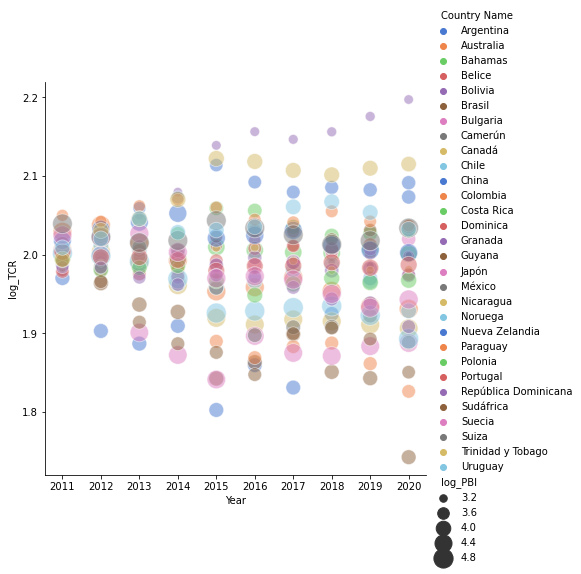

In [68]:
sns.relplot(x="Year", y="log_TCR", hue="Country Name", size="log_PBI",
            sizes=(40, 400), alpha=.5, palette="muted",
            height=6, data=final)

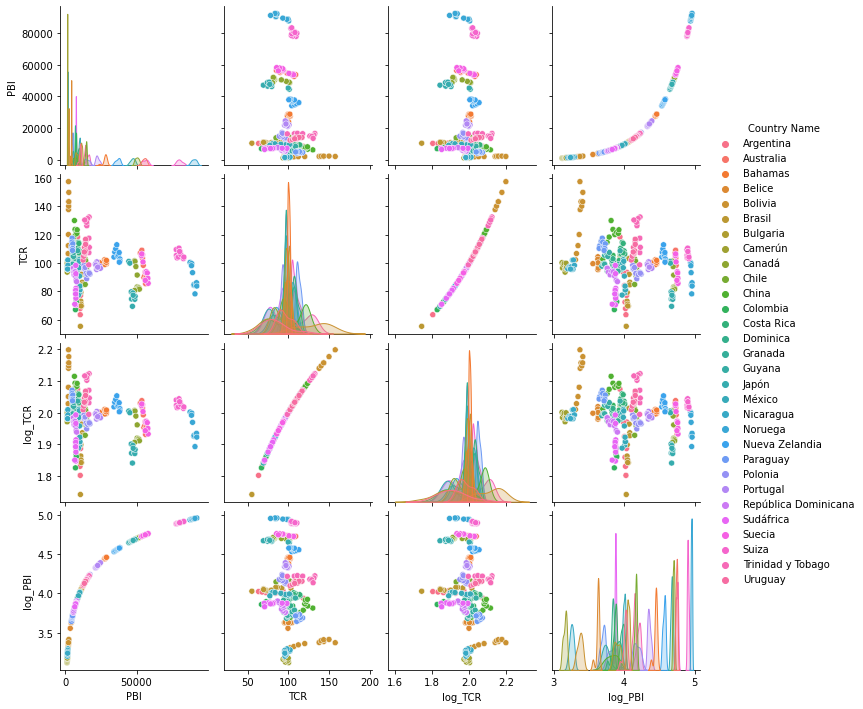

In [70]:
sns.pairplot(final, hue="Country Name")

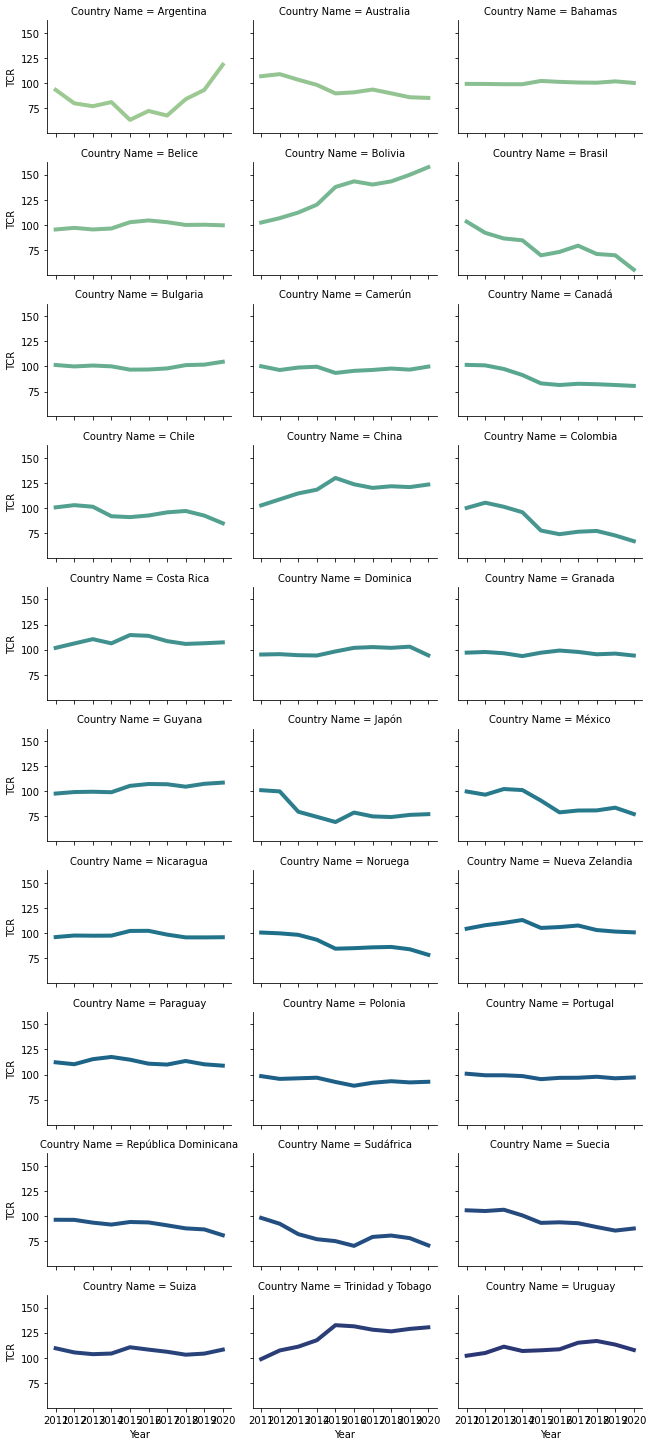

In [74]:
g = sns.relplot(
    data=final,
    x="Year", y="TCR", col="Country Name", hue="Country Name",
    kind="line", palette="crest", linewidth=4, zorder=5,
    col_wrap=3, height=2, aspect=1.5, legend=False,
)


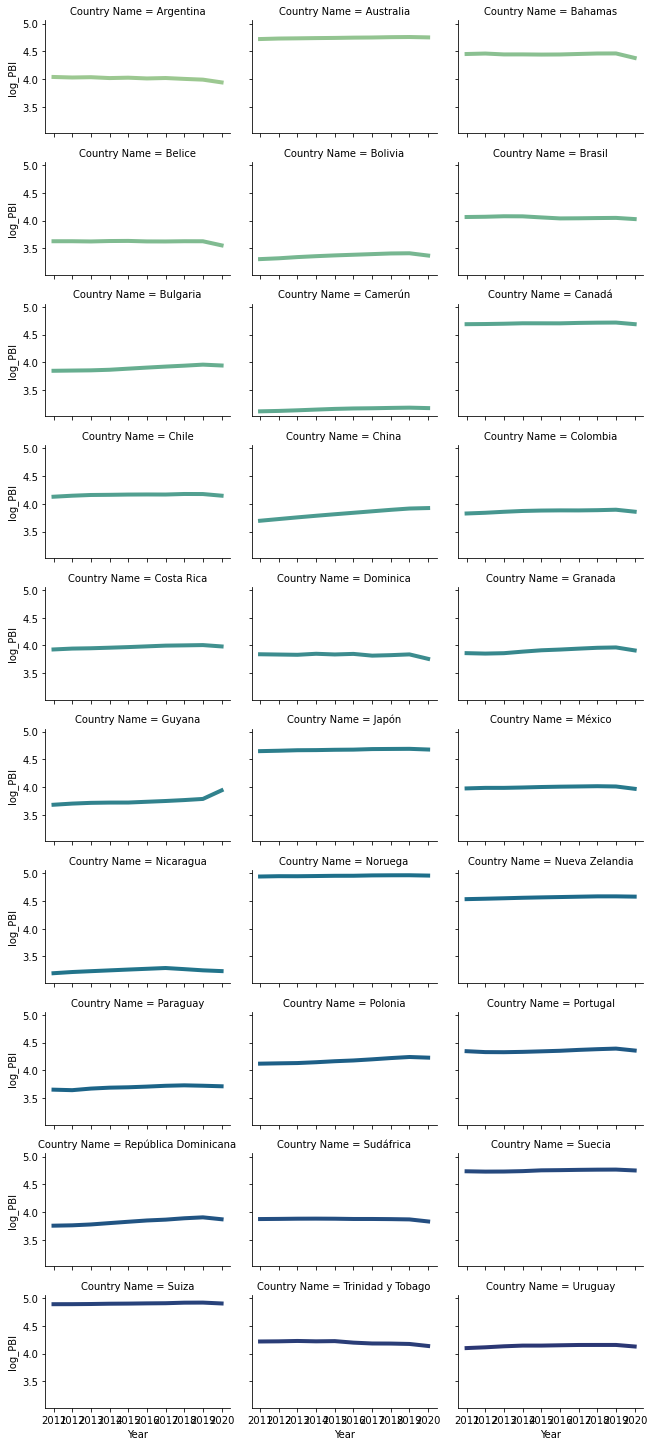

In [75]:
f = sns.relplot(
    data=final,
    x="Year", y="log_PBI", col="Country Name", hue="Country Name",
    kind="line", palette="crest", linewidth=4, zorder=5,
    col_wrap=3, height=2, aspect=1.5, legend=False,
)


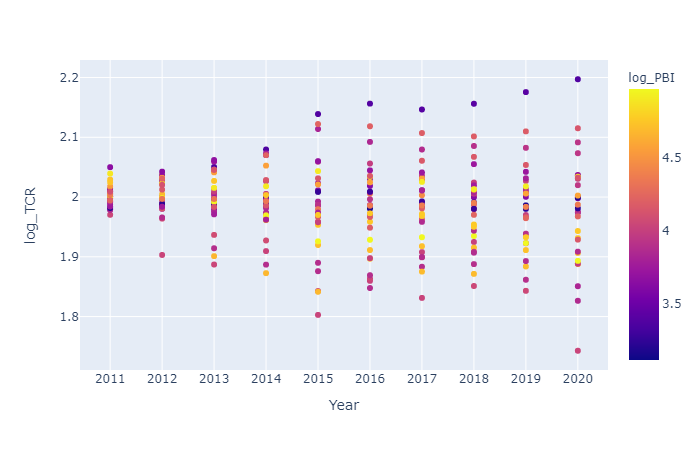

In [88]:
fig = px.scatter(final, x="Year", y="log_TCR", color='log_PBI')
fig.show('png')

In [19]:
#table.to_csv('basefinal.csv')